# Neural Networks Sprint Challenge

## 1) Define the following terms:

### Neuron:
Neoron is a computational unit that takes given input and outputs an answer. Or, an algorithm called a neural network is typically composed of individual, interconnected units called neurons, nodes or units.It is a basic unit of a neural netwrok. it gets certain number of inputs and a bias value. When a signal(value) arrives, it gets multiplied by a weight vlaue. If a neuron has 4 inputs, it has 4 weights values whcih can be adjusted during training time. 

### Input Layer:
Also called a visible layer, input layer is the first and only visible layer of the nureal network where the inputs + a bais term is passed on to next 'hidden layers'. 

### Hidden Layer:
Hidden layer is where the actual processing happens. The processing is done via system of weighted 'connections' 

### Output Layer
The hidden layers link tp the output layer where the answer is output. Th values of the hidden layer are not observed in the training set.The purpose of the output layer is to output a vector of vlaues that is in a format that is suitable for the type of problem that we are trying to address. Typically, the output values are modified by an "activation function" to transform it inot a format that makes sense for our context. 

### Activation:
Activation functions(Transfer functions) are used to introduce non-linearity to neural networks. It squashes the values in a smaller range viz a Sigmoid activation squashes values between a range 0 and 1. There are many activation functions used in deep learning field and ReLU, SeLU, and TanH are preferred over sigmoid function. 

### Backpropagation: 
backpropagation is used as a learning algorithm to compute a gradient descent with respect to weights. It's a method to adjust weights to minimize the error between actual and predicted output. It's another name given to finding the gradient of the cost function in a neural network. The basic concept behind this approach is to generate an expected output signal from a particular function by transforming internal weightings of input signals 

 YOUR ANSWER HERE

## 2) Create a perceptron class that can model the behavior of an AND gate. You can use the following table as your training data:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 1  | 1  | 1  | 1 |
| 1  | 0  | 1  | 0 |
| 0  | 1  | 1  | 0 |
| 0  | 0  | 1  | 0 |

### Create a perceptron class
ref: https://medium.com/@thomascountz/19-line-line-by-line-python-perceptron-b6f113b161f3 a

In [72]:
class Perceptron(object):

    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
           
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
            activation = 1
        else:
            activation = 0            
        return activation

    def train(self, training_inputs, labels):
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

### Let's create X and y from the the given data table

In [73]:
import numpy as np
np.random.seed(1)

X = np.array([[1,1,1],
              [1,0,1],
              [0,1,1],
              [0,0,1]])

y = np.array([[1],
              [0],
              [0],
              [0]])

In [74]:
X.shape, y.shape

((4, 3), (4, 1))

### Create an object of Perceptron class & train X and y

In [76]:
pn = Perceptron(no_of_inputs=3, threshold=100, learning_rate=0.01)
pn.train(X, y)

In [77]:
#let's print the weights
pn.weights

array([-0.02,  0.02,  0.03, -0.02])

### Check if AND gate is predicted correctly

In [80]:
print("Perceptron's predictions for AND gate")
for row in X:
    print(f'{row[0]} {row[1]} {row[2]} -> {pn.predict(row)}')

Perceptron's predictions for AND gate
1 1 1 -> 1
1 0 1 -> 0
0 1 1 -> 0
0 0 1 -> 0


### ...........The below method doesn't seem to predict AND gate that well......

### The way we did it in the class

In [111]:
import numpy as np
np.random.seed(1)

X = np.array([[1,1,1],
              [1,0,1],
              [0,1,1],
              [0,0,1]])

correct_ouputs = [[1],
                  [1],
                  [1],
                  [0]]

### Sigmoid activation function and its derivative for updating weights

In [112]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

### Initialize random weights

In [113]:
weights = 2 * np.random.random((3,1)) -1 
weights

array([[-0.16595599],
       [ 0.44064899],
       [-0.99977125]])

### calculate weighted sum of inputs and weights

In [116]:
weighted_sum = np.dot(X, weights)
weighted_sum

array([[-0.72507825],
       [-1.16572724],
       [-0.55912226],
       [-0.99977125]])

### Output the activated value for the end of 1 training epoch

In [117]:
activated_output = sigmoid(weighted_sum)
activated_output

array([[0.3262757 ],
       [0.23762817],
       [0.36375058],
       [0.2689864 ]])

### Take teh differnece

In [118]:
error = correct_outputs- activated_output
error

array([[ 0.6737243 ],
       [-0.23762817],
       [-0.36375058],
       [-0.2689864 ]])

In [119]:
adjustments = error * sigmoid_derivative(activated_output) ### Gradient Descent /backpropagation magic
adjustments

array([[ 0.16402681],
       [-0.05857624],
       [-0.08799467],
       [-0.06604473]])

### Update weights

In [121]:
weights += np.dot(X.T, adjustments)
weights

array([[-0.06050542],
       [ 0.51668113],
       [-1.04836008]])

In [124]:
for interation in range(5000):
    #weighted sum of inputs and weights
    weighted_sum = np.dot(X, weights)
    
    # Activate with sigmoid function
    activated_output = sigmoid(weighted_sum)
    
    # Calulate error
    error = correct_ouputs - activated_output
    
    # Calculate weight adjustment with sigmoid derivative
    adjustments = error* sigmoid_derivative(activated_output)
    
    # updated weights
    weights += np.dot(X.T, adjustments)
    
print('optimized weights after training: ')
print(weights)

print("Output after Training:")
print(activated_output)

optimized weights after training: 
[[11.70048323]
 [11.70050313]
 [-5.51058112]]
Output after Training:
[[0.99999998]
 [0.99795376]
 [0.9979538 ]
 [0.00402828]]


## 3) Implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights. 
- Your network must have one hidden layer. 
- You do not have to update weights via gradient descent. You can use something like the derivative of the sigmoid function to update weights.
- Train your model on the Heart Disease dataset from UCI:

[Github Dataset](https://github.com/ryanleeallred/datasets/blob/master/heart.csv)

[Raw File on Github](https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv)


### Let's import the data

In [15]:
import pandas as pd

In [81]:
url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv'

In [82]:
df = pd.read_csv(url)

In [83]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [84]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
### Create X Matix and Y column vector from the data

In [85]:
X = df.drop(columns=['target']).values
y = df['target'].values

In [86]:
X.shape, y.shape

((303, 13), (303,))

In [87]:
y = np.reshape(y,(-1,1))

In [88]:
y.shape

(303, 1)

### Create and implement a class 
from class lecture

In [89]:
class Neural_Network(object):
    def __init__(self):
        self.inputs = 13
        self.hiddenNodes = 10
        self.outputNodes =1
        
        # Initialize weights
        self.L1_weights = np.random.randn(self.inputs, self.hiddenNodes) #(2x3)
#       self.L2_weights = np.random.randn(self.hiddenNodes, self.hiddenNodes)
        self.L2_weights = np.random.randn(self.hiddenNodes, self.outputNodes)
    
    def feed_forward(self, X):
        # Weighted sum between inputs and hidden layer
        self.hidden_sum = np.dot(X, self.L1_weights)
        # Activations on weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        # Weighted sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.L2_weights)
        # final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        return self.activated_output
    
    def sigmoid(self, s):
        return 1/(1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def backward(self, X, y, o):
        #backward propgate through the network
        self.o_error = y - o # error in output
        self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid ot error
        
        self.z2_error = self.o_delta.dot(self.L2_weights.T) # z2 error: how much our hidden layer weights contributed to output error
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.activated_hidden) # applying derivative of sigmoid to z2 error
        
        self.L1_weights += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
        self.L2_weights += self.activated_hidden.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X,y,o)

In [90]:
NN = Neural_Network()
for i in range(100): # trains the NN 1,000 times
    if i+1 in [1,2,3,4,5] or (i+1) % 50 == 0:
        print('+----------EPOCH', i+1, '----------+')
        print("Input: \n", X)
        print("Actual Output: \n", y)
        print("Predicted Output: \n" + str(NN.feed_forward(X)))
        print("Loss: \n" + str(np.mean(np.square(y - NN.feed_forward(X))))) #mean sum squared loss
        print("\n")
    NN.train(X,y)

+----------EPOCH 1 ----------+
Input: 
 [[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]
Actual Output: 
 [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 

 [1.62344649e-19]]
Loss: 
0.5445544554455446


+----------EPOCH 100 ----------+
Input: 
 [[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]
Actual Output: 
 [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [

### Loss after each epoch

In [97]:
NN = Neural_Network()
for i in range(100): # trains the NN 1,000 times
    if i+1 in [1,2,3,4,5] or (i+1) % 50 == 0:
        print('+----------EPOCH', i+1, '----------+')
        print("Loss: \n" + str(np.mean(np.square(y - NN.feed_forward(X))))) #mean sum squared loss
        print("\n")
    NN.train(X,y)

+----------EPOCH 1 ----------+
Loss: 
0.460559226629027


+----------EPOCH 2 ----------+
Loss: 
0.4554455445544551


+----------EPOCH 3 ----------+
Loss: 
0.4554455445544551


+----------EPOCH 4 ----------+
Loss: 
0.4554455445544551


+----------EPOCH 5 ----------+
Loss: 
0.4554455445544551


+----------EPOCH 50 ----------+
Loss: 
0.4554455445544551


+----------EPOCH 100 ----------+
Loss: 
0.4554455445544551




## 4) Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy. 

- Use the Heart Disease Dataset (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network. 
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
- When hyperparameter tuning, show you work by adding code cells for each new experiment. 
- Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
- You must hyperparameter tune at least 5 parameters in order to get a 3 on this section.

### same data: still load it again

In [36]:
url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv'

In [37]:
df = pd.read_csv(url)

In [38]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
X = df.drop(columns=['target']).values
y = df['target'].values

y = np.reshape(y, (-1,1))

In [40]:
X.shape, y.shape

((303, 13), (303,))

### Let's standarize X 

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [44]:
X.shape

(303, 13)

In [45]:
X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

### 1. Use an appropriate loss function for a binary classification task: 'binary_crossentropy'

### 2. Use an appropriate activation function on the final layer of your network: "sigmoid"

### 3. Train your model using verbose output for ease of grading: verbose=1

### 4. Use GridSearchCV to hyperparameter tune your model:Batch size, epochs, momentum and learning rate, activation function, number of hidden layers

### Best choice of hyperparameters in my case
is when epochs = 20 and batch_size is 10 which is achieved when I tuned just the batch size (accuracy 0.854785). Best: 0.854785 using {'batch_size': 10, 'epochs': 20}
Tuning of other hyperparameters worsen the results. May be the tuning has to be more specific than what I tried here. 

In [46]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [51]:
# Random Seed
seed = 42
np.random.seed(seed)


# Split into X and y and turn into numpy arays
X = X
y = y

# Important Hyperparameters
inputs = X.shape[1]
epochs = [50]
batch_size = [10]

# Function to create model for KerasClassifcation
def baseline_model():
# create model
    model = Sequential()
    model.add(Dense(50, input_dim=inputs, activation='relu')) 
#     model.add(Dense(100, activation='relu')) 
    model.add(Dense(20, activation='relu')) 
    model.add(Dense(1, activation= 'sigmoid'))
    # Compile model
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

# Create model
model = KerasClassifier(build_fn=baseline_model, verbose=1)

#Define 5 fold corss validation test harness
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

param_grid = dict(batch_size=batch_size, epochs=epochs)

# Create Gird Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=kfold)

# Fit
grid_result = grid.fit(X,y)


Epoch 1/50
202/202 [==============================] - 0s 2ms/step - loss: 0.6923 - acc: 0.4703
Epoch 2/50
202/202 [==============================] - 0s 126us/step - loss: 0.5409 - acc: 0.7525
Epoch 3/50
202/202 [==============================] - 0s 149us/step - loss: 0.4508 - acc: 0.8564
Epoch 4/50
202/202 [==============================] - 0s 149us/step - loss: 0.3914 - acc: 0.8564
Epoch 5/50
202/202 [==============================] - 0s 173us/step - loss: 0.3488 - acc: 0.8663
Epoch 6/50
202/202 [==============================] - 0s 129us/step - loss: 0.3197 - acc: 0.8663
Epoch 7/50
202/202 [==============================] - 0s 148us/step - loss: 0.3005 - acc: 0.8713
Epoch 8/50
202/202 [==============================] - 0s 138us/step - loss: 0.2825 - acc: 0.8861
Epoch 9/50
202/202 [==============================] - 0s 139us/step - loss: 0.2724 - acc: 0.8861
Epoch 10/50
202/202 [==============================] - 0s 129us/step - loss: 0.2620 - acc: 0.8861
Epoch 11/50
202/202 [==========

202/202 [==============================] - 0s 127us/step - loss: 0.1923 - acc: 0.9307
Epoch 34/50
202/202 [==============================] - 0s 131us/step - loss: 0.1848 - acc: 0.9406
Epoch 35/50
202/202 [==============================] - 0s 128us/step - loss: 0.1804 - acc: 0.9406
Epoch 36/50
202/202 [==============================] - 0s 135us/step - loss: 0.1749 - acc: 0.9406
Epoch 37/50
202/202 [==============================] - 0s 124us/step - loss: 0.1691 - acc: 0.9455
Epoch 38/50
202/202 [==============================] - 0s 121us/step - loss: 0.1639 - acc: 0.9505
Epoch 39/50
202/202 [==============================] - 0s 170us/step - loss: 0.1582 - acc: 0.9455
Epoch 40/50
202/202 [==============================] - 0s 124us/step - loss: 0.1538 - acc: 0.9505
Epoch 41/50
202/202 [==============================] - 0s 117us/step - loss: 0.1498 - acc: 0.9455
Epoch 42/50
202/202 [==============================] - 0s 141us/step - loss: 0.1452 - acc: 0.9505
Epoch 43/50
202/202 [===========

303/303 [==============================] - 0s 146us/step - loss: 0.2460 - acc: 0.9076
Epoch 15/50
303/303 [==============================] - 0s 140us/step - loss: 0.2409 - acc: 0.9142
Epoch 16/50
303/303 [==============================] - 0s 181us/step - loss: 0.2358 - acc: 0.9142
Epoch 17/50
303/303 [==============================] - 0s 162us/step - loss: 0.2279 - acc: 0.9208
Epoch 18/50
303/303 [==============================] - 0s 160us/step - loss: 0.2237 - acc: 0.9208
Epoch 19/50
303/303 [==============================] - 0s 161us/step - loss: 0.2148 - acc: 0.9175
Epoch 20/50
303/303 [==============================] - 0s 120us/step - loss: 0.2095 - acc: 0.9208
Epoch 21/50
303/303 [==============================] - 0s 123us/step - loss: 0.2032 - acc: 0.9241
Epoch 22/50
303/303 [==============================] - 0s 111us/step - loss: 0.1997 - acc: 0.9274
Epoch 23/50
303/303 [==============================] - 0s 116us/step - loss: 0.1920 - acc: 0.9406
Epoch 24/50
303/303 [===========

In [50]:
print(f"Best: {grid_result.best_score_:3f} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.841584 using {'batch_size': 10, 'epochs': 50}
Means: 0.8415841607764216, Stdev: 0.03523788312534825 with: {'batch_size': 10, 'epochs': 50}


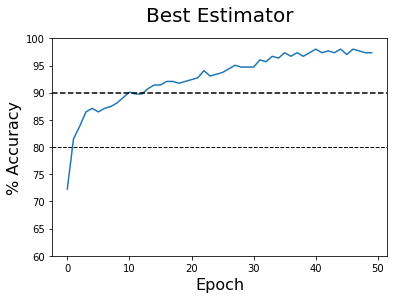

In [55]:
import matplotlib.pyplot as plt
# Plot the accuracy of the best estimator in the gridsearch
acc = [x*100 for x in grid_result.best_estimator_.model.history.history['acc']]
fig, ax = plt.subplots()
ax.plot(acc)
ax.set_xlabel('Epoch', fontsize=16)
ax.set_ylabel('% Accuracy', fontsize=16)
ax.set_ylim(60,100)
ax.axhline(80, color='k', linestyle='--', linewidth=1)
ax.axhline(90, color='k', linestyle='--')
plt.title('Best Estimator', fontsize=20, y=1.05)
plt.show()

### 1. Hyperparameter tune: batch_size

In [56]:
# Random Seed
seed = 42
np.random.seed(seed)


# Split into X and y and turn into numpy arays
X = X
y = y

# Important Hyperparameters
inputs = X.shape[1]

# Function to create model for KerasClassifcation
def baseline_model():
# create model
    model = Sequential()
    model.add(Dense(50, input_dim=inputs, activation='relu')) 
#     model.add(Dense(100, activation='relu')) 
    model.add(Dense(20, activation='relu')) 
    model.add(Dense(1, activation= 'sigmoid'))
    # Compile model
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

# Create model
model = KerasClassifier(build_fn=baseline_model, verbose=1)

#Define 5 fold corss validation test harness
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

param_grid = param_grid = {'batch_size':[10,20,40,60,80,100], 'epochs':[20]}

# Create Gird Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=kfold)

# Fit
grid_result = grid.fit(X,y)


Epoch 1/20
202/202 [==============================] - 1s 3ms/step - loss: 0.6923 - acc: 0.4703
Epoch 2/20
202/202 [==============================] - 0s 130us/step - loss: 0.5409 - acc: 0.7525
Epoch 3/20
202/202 [==============================] - 0s 120us/step - loss: 0.4508 - acc: 0.8564
Epoch 4/20
202/202 [==============================] - 0s 211us/step - loss: 0.3914 - acc: 0.8564
Epoch 5/20
202/202 [==============================] - 0s 131us/step - loss: 0.3488 - acc: 0.8663
Epoch 6/20
202/202 [==============================] - 0s 129us/step - loss: 0.3197 - acc: 0.8663
Epoch 7/20
202/202 [==============================] - 0s 137us/step - loss: 0.3005 - acc: 0.8713
Epoch 8/20
202/202 [==============================] - 0s 132us/step - loss: 0.2825 - acc: 0.8861
Epoch 9/20
202/202 [==============================] - 0s 129us/step - loss: 0.2724 - acc: 0.8861
Epoch 10/20
202/202 [==============================] - 0s 141us/step - loss: 0.2620 - acc: 0.8861
Epoch 11/20
202/202 [==========

202/202 [==============================] - 0s 41us/step
Epoch 1/20
202/202 [==============================] - 1s 4ms/step - loss: 0.7159 - acc: 0.5396
Epoch 2/20
202/202 [==============================] - 0s 86us/step - loss: 0.6134 - acc: 0.7228
Epoch 3/20
202/202 [==============================] - 0s 91us/step - loss: 0.5475 - acc: 0.7574
Epoch 4/20
202/202 [==============================] - 0s 75us/step - loss: 0.4975 - acc: 0.7822
Epoch 5/20
202/202 [==============================] - 0s 66us/step - loss: 0.4609 - acc: 0.7970
Epoch 6/20
202/202 [==============================] - 0s 75us/step - loss: 0.4316 - acc: 0.7970
Epoch 7/20
202/202 [==============================] - 0s 63us/step - loss: 0.4115 - acc: 0.7970
Epoch 8/20
202/202 [==============================] - 0s 65us/step - loss: 0.3942 - acc: 0.8069
Epoch 9/20
202/202 [==============================] - 0s 72us/step - loss: 0.3808 - acc: 0.8168
Epoch 10/20
202/202 [==============================] - 0s 71us/step - loss: 0.368

202/202 [==============================] - 0s 40us/step
Epoch 1/20
202/202 [==============================] - 1s 6ms/step - loss: 0.7308 - acc: 0.4158
Epoch 2/20
202/202 [==============================] - 0s 42us/step - loss: 0.6827 - acc: 0.5594
Epoch 3/20
202/202 [==============================] - 0s 48us/step - loss: 0.6485 - acc: 0.7030
Epoch 4/20
202/202 [==============================] - 0s 62us/step - loss: 0.6167 - acc: 0.7574
Epoch 5/20
202/202 [==============================] - 0s 48us/step - loss: 0.5877 - acc: 0.7970
Epoch 6/20
202/202 [==============================] - 0s 73us/step - loss: 0.5609 - acc: 0.8218
Epoch 7/20
202/202 [==============================] - 0s 57us/step - loss: 0.5381 - acc: 0.8317
Epoch 8/20
202/202 [==============================] - 0s 68us/step - loss: 0.5160 - acc: 0.8515
Epoch 9/20
202/202 [==============================] - 0s 45us/step - loss: 0.4948 - acc: 0.8614
Epoch 10/20
202/202 [==============================] - 0s 69us/step - loss: 0.475

202/202 [==============================] - 0s 21us/step
Epoch 1/20
202/202 [==============================] - 1s 7ms/step - loss: 0.7189 - acc: 0.4505
Epoch 2/20
202/202 [==============================] - 0s 29us/step - loss: 0.6793 - acc: 0.4851
Epoch 3/20
202/202 [==============================] - 0s 30us/step - loss: 0.6446 - acc: 0.5099
Epoch 4/20
202/202 [==============================] - 0s 36us/step - loss: 0.6158 - acc: 0.5594
Epoch 5/20
202/202 [==============================] - 0s 35us/step - loss: 0.5881 - acc: 0.6089
Epoch 6/20
202/202 [==============================] - 0s 28us/step - loss: 0.5628 - acc: 0.7178
Epoch 7/20
202/202 [==============================] - 0s 27us/step - loss: 0.5410 - acc: 0.7871
Epoch 8/20
202/202 [==============================] - 0s 46us/step - loss: 0.5196 - acc: 0.7871
Epoch 9/20
202/202 [==============================] - 0s 31us/step - loss: 0.5001 - acc: 0.7970
Epoch 10/20
202/202 [==============================] - 0s 33us/step - loss: 0.481

202/202 [==============================] - 0s 31us/step
Epoch 1/20
202/202 [==============================] - 2s 8ms/step - loss: 0.7175 - acc: 0.4455
Epoch 2/20
202/202 [==============================] - 0s 39us/step - loss: 0.6876 - acc: 0.5347
Epoch 3/20
202/202 [==============================] - 0s 28us/step - loss: 0.6647 - acc: 0.6188
Epoch 4/20
202/202 [==============================] - 0s 34us/step - loss: 0.6464 - acc: 0.6337
Epoch 5/20
202/202 [==============================] - 0s 32us/step - loss: 0.6301 - acc: 0.6485
Epoch 6/20
202/202 [==============================] - 0s 24us/step - loss: 0.6155 - acc: 0.6881
Epoch 7/20
202/202 [==============================] - 0s 32us/step - loss: 0.6012 - acc: 0.7178
Epoch 8/20
202/202 [==============================] - 0s 33us/step - loss: 0.5886 - acc: 0.7277
Epoch 9/20
202/202 [==============================] - 0s 32us/step - loss: 0.5777 - acc: 0.7327
Epoch 10/20
202/202 [==============================] - 0s 30us/step - loss: 0.569

In [58]:
print(f"Best: {grid_result.best_score_:3f} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.854785 using {'batch_size': 10, 'epochs': 20}
Means: 0.8547854742201249, Stdev: 0.041484504089362106 with: {'batch_size': 10, 'epochs': 20}
Means: 0.8085808643806885, Stdev: 0.032671597748378675 with: {'batch_size': 20, 'epochs': 20}
Means: 0.8184818629384434, Stdev: 0.030605998962546545 with: {'batch_size': 40, 'epochs': 20}
Means: 0.8283828306119434, Stdev: 0.023336872070246564 with: {'batch_size': 60, 'epochs': 20}
Means: 0.8184818521191185, Stdev: 0.04452387771506083 with: {'batch_size': 80, 'epochs': 20}
Means: 0.8052805335608253, Stdev: 0.009334738534808732 with: {'batch_size': 100, 'epochs': 20}


### 2. No of Epochs

In [61]:
# Random Seed
seed = 42
np.random.seed(seed)


# Split into X and y and turn into numpy arays
X = X
y = y

# Important Hyperparameters
inputs = X.shape[1]

# Function to create model for KerasClassifcation
def baseline_model():
# create model
    model = Sequential()
    model.add(Dense(50, input_dim=inputs, activation='relu')) 
#     model.add(Dense(100, activation='relu')) 
    model.add(Dense(20, activation='relu')) 
    model.add(Dense(1, activation= 'sigmoid'))
    # Compile model
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

# Create model
model = KerasClassifier(build_fn=baseline_model, verbose=1)

#Define 5 fold corss validation test harness
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

param_grid = {'batch_size': [60, 80],
              'epochs': [20, 40, 60, 80]}

# Create Gird Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=kfold)

# Fit
grid_result = grid.fit(X,y)

Epoch 1/20
202/202 [==============================] - 2s 9ms/step - loss: 0.7617 - acc: 0.4554
Epoch 2/20
202/202 [==============================] - 0s 35us/step - loss: 0.6999 - acc: 0.4703
Epoch 3/20
202/202 [==============================] - 0s 36us/step - loss: 0.6514 - acc: 0.5099
Epoch 4/20
202/202 [==============================] - 0s 40us/step - loss: 0.6089 - acc: 0.5842
Epoch 5/20
202/202 [==============================] - 0s 51us/step - loss: 0.5721 - acc: 0.6733
Epoch 6/20
202/202 [==============================] - 0s 46us/step - loss: 0.5395 - acc: 0.7871
Epoch 7/20
202/202 [==============================] - 0s 41us/step - loss: 0.5104 - acc: 0.8267
Epoch 8/20
202/202 [==============================] - 0s 43us/step - loss: 0.4843 - acc: 0.8515
Epoch 9/20
202/202 [==============================] - 0s 59us/step - loss: 0.4606 - acc: 0.8614
Epoch 10/20
202/202 [==============================] - 0s 37us/step - loss: 0.4387 - acc: 0.8663
Epoch 11/20
202/202 [===================

202/202 [==============================] - 0s 59us/step - loss: 0.3044 - acc: 0.8960
Epoch 23/40
202/202 [==============================] - 0s 42us/step - loss: 0.2980 - acc: 0.8960
Epoch 24/40
202/202 [==============================] - 0s 39us/step - loss: 0.2916 - acc: 0.8911
Epoch 25/40
202/202 [==============================] - 0s 48us/step - loss: 0.2858 - acc: 0.8861
Epoch 26/40
202/202 [==============================] - 0s 85us/step - loss: 0.2803 - acc: 0.8861
Epoch 27/40
202/202 [==============================] - 0s 45us/step - loss: 0.2755 - acc: 0.8911
Epoch 28/40
202/202 [==============================] - 0s 41us/step - loss: 0.2705 - acc: 0.8911
Epoch 29/40
202/202 [==============================] - 0s 45us/step - loss: 0.2655 - acc: 0.8911
Epoch 30/40
202/202 [==============================] - 0s 66us/step - loss: 0.2609 - acc: 0.8960
Epoch 31/40
202/202 [==============================] - 0s 53us/step - loss: 0.2569 - acc: 0.8960
Epoch 32/40
202/202 [=====================

202/202 [==============================] - 0s 43us/step - loss: 0.3268 - acc: 0.8812
Epoch 25/40
202/202 [==============================] - 0s 56us/step - loss: 0.3208 - acc: 0.8812
Epoch 26/40
202/202 [==============================] - 0s 43us/step - loss: 0.3154 - acc: 0.8812
Epoch 27/40
202/202 [==============================] - 0s 34us/step - loss: 0.3109 - acc: 0.8812
Epoch 28/40
202/202 [==============================] - 0s 42us/step - loss: 0.3062 - acc: 0.8861
Epoch 29/40
202/202 [==============================] - 0s 41us/step - loss: 0.3019 - acc: 0.8911
Epoch 30/40
202/202 [==============================] - 0s 53us/step - loss: 0.2979 - acc: 0.8960
Epoch 31/40
202/202 [==============================] - 0s 44us/step - loss: 0.2941 - acc: 0.8960
Epoch 32/40
202/202 [==============================] - 0s 50us/step - loss: 0.2900 - acc: 0.8960
Epoch 33/40
202/202 [==============================] - 0s 49us/step - loss: 0.2860 - acc: 0.9010
Epoch 34/40
202/202 [=====================

202/202 [==============================] - 0s 40us/step - loss: 0.6391 - acc: 0.6485
Epoch 7/60
202/202 [==============================] - 0s 42us/step - loss: 0.6187 - acc: 0.6931
Epoch 8/60
202/202 [==============================] - 0s 49us/step - loss: 0.6007 - acc: 0.7277
Epoch 9/60
202/202 [==============================] - 0s 62us/step - loss: 0.5840 - acc: 0.7574
Epoch 10/60
202/202 [==============================] - 0s 40us/step - loss: 0.5685 - acc: 0.7723
Epoch 11/60
202/202 [==============================] - 0s 43us/step - loss: 0.5525 - acc: 0.7772
Epoch 12/60
202/202 [==============================] - 0s 40us/step - loss: 0.5376 - acc: 0.7822
Epoch 13/60
202/202 [==============================] - 0s 55us/step - loss: 0.5212 - acc: 0.7970
Epoch 14/60
202/202 [==============================] - 0s 45us/step - loss: 0.5068 - acc: 0.8119
Epoch 15/60
202/202 [==============================] - 0s 44us/step - loss: 0.4919 - acc: 0.8218
Epoch 16/60
202/202 [========================

202/202 [==============================] - 0s 44us/step - loss: 0.2844 - acc: 0.8911
Epoch 30/60
202/202 [==============================] - 0s 42us/step - loss: 0.2812 - acc: 0.8911
Epoch 31/60
202/202 [==============================] - 0s 46us/step - loss: 0.2776 - acc: 0.8911
Epoch 32/60
202/202 [==============================] - 0s 68us/step - loss: 0.2750 - acc: 0.8911
Epoch 33/60
202/202 [==============================] - 0s 54us/step - loss: 0.2717 - acc: 0.8911
Epoch 34/60
202/202 [==============================] - 0s 52us/step - loss: 0.2688 - acc: 0.8911
Epoch 35/60
202/202 [==============================] - 0s 59us/step - loss: 0.2656 - acc: 0.8911
Epoch 36/60
202/202 [==============================] - 0s 53us/step - loss: 0.2627 - acc: 0.8911
Epoch 37/60
202/202 [==============================] - 0s 53us/step - loss: 0.2597 - acc: 0.8960
Epoch 38/60
202/202 [==============================] - 0s 42us/step - loss: 0.2566 - acc: 0.8960
Epoch 39/60
202/202 [=====================

202/202 [==============================] - 0s 37us/step - loss: 0.1992 - acc: 0.9307
Epoch 53/80
202/202 [==============================] - 0s 48us/step - loss: 0.1967 - acc: 0.9307
Epoch 54/80
202/202 [==============================] - 0s 60us/step - loss: 0.1943 - acc: 0.9307
Epoch 55/80
202/202 [==============================] - 0s 43us/step - loss: 0.1922 - acc: 0.9307
Epoch 56/80
202/202 [==============================] - 0s 39us/step - loss: 0.1897 - acc: 0.9307
Epoch 57/80
202/202 [==============================] - 0s 71us/step - loss: 0.1874 - acc: 0.9307
Epoch 58/80
202/202 [==============================] - 0s 58us/step - loss: 0.1854 - acc: 0.9356
Epoch 59/80
202/202 [==============================] - 0s 48us/step - loss: 0.1834 - acc: 0.9406
Epoch 60/80
202/202 [==============================] - 0s 57us/step - loss: 0.1810 - acc: 0.9356
Epoch 61/80
202/202 [==============================] - 0s 52us/step - loss: 0.1790 - acc: 0.9356
Epoch 62/80
202/202 [=====================

202/202 [==============================] - 0s 67us/step - loss: 0.2361 - acc: 0.9208
Epoch 56/80
202/202 [==============================] - 0s 44us/step - loss: 0.2339 - acc: 0.9208
Epoch 57/80
202/202 [==============================] - 0s 48us/step - loss: 0.2303 - acc: 0.9257
Epoch 58/80
202/202 [==============================] - 0s 51us/step - loss: 0.2276 - acc: 0.9208
Epoch 59/80
202/202 [==============================] - 0s 62us/step - loss: 0.2250 - acc: 0.9257
Epoch 60/80
202/202 [==============================] - 0s 39us/step - loss: 0.2226 - acc: 0.9307
Epoch 61/80
202/202 [==============================] - 0s 44us/step - loss: 0.2197 - acc: 0.9307
Epoch 62/80
202/202 [==============================] - 0s 43us/step - loss: 0.2176 - acc: 0.9307
Epoch 63/80
202/202 [==============================] - 0s 62us/step - loss: 0.2150 - acc: 0.9307
Epoch 64/80
202/202 [==============================] - 0s 52us/step - loss: 0.2120 - acc: 0.9307
Epoch 65/80
202/202 [=====================

202/202 [==============================] - 0s 47us/step - loss: 0.2295 - acc: 0.9257
Epoch 59/80
202/202 [==============================] - 0s 40us/step - loss: 0.2269 - acc: 0.9257
Epoch 60/80
202/202 [==============================] - 0s 47us/step - loss: 0.2245 - acc: 0.9307
Epoch 61/80
202/202 [==============================] - 0s 43us/step - loss: 0.2221 - acc: 0.9307
Epoch 62/80
202/202 [==============================] - 0s 60us/step - loss: 0.2195 - acc: 0.9307
Epoch 63/80
202/202 [==============================] - 0s 49us/step - loss: 0.2177 - acc: 0.9257
Epoch 64/80
202/202 [==============================] - 0s 44us/step - loss: 0.2143 - acc: 0.9307
Epoch 65/80
202/202 [==============================] - 0s 42us/step - loss: 0.2117 - acc: 0.9307
Epoch 66/80
202/202 [==============================] - 0s 39us/step - loss: 0.2094 - acc: 0.9307
Epoch 67/80
202/202 [==============================] - 0s 39us/step - loss: 0.2068 - acc: 0.9307
Epoch 68/80
202/202 [=====================

202/202 [==============================] - 0s 38us/step - loss: 0.4093 - acc: 0.8366
Epoch 20/20
202/202 [==============================] - 0s 47us/step
Epoch 1/40
202/202 [==============================] - 3s 14ms/step - loss: 0.8122 - acc: 0.4752
Epoch 2/40
202/202 [==============================] - 0s 43us/step - loss: 0.7642 - acc: 0.4851
Epoch 3/40
202/202 [==============================] - 0s 32us/step - loss: 0.7231 - acc: 0.5000
Epoch 4/40
202/202 [==============================] - 0s 36us/step - loss: 0.6876 - acc: 0.5297
Epoch 5/40
202/202 [==============================] - 0s 36us/step - loss: 0.6560 - acc: 0.5743
Epoch 6/40
202/202 [==============================] - 0s 34us/step - loss: 0.6285 - acc: 0.6188
Epoch 7/40
202/202 [==============================] - 0s 61us/step - loss: 0.6035 - acc: 0.6436
Epoch 8/40
202/202 [==============================] - 0s 33us/step - loss: 0.5822 - acc: 0.6931
Epoch 9/40
202/202 [==============================] - 0s 35us/step - loss: 0.56

202/202 [==============================] - 0s 44us/step
Epoch 1/40
202/202 [==============================] - 3s 16ms/step - loss: 0.7176 - acc: 0.5050
Epoch 2/40
202/202 [==============================] - 0s 39us/step - loss: 0.6830 - acc: 0.5594
Epoch 3/40
202/202 [==============================] - 0s 54us/step - loss: 0.6531 - acc: 0.6634
Epoch 4/40
202/202 [==============================] - 0s 38us/step - loss: 0.6276 - acc: 0.7228
Epoch 5/40
202/202 [==============================] - 0s 51us/step - loss: 0.6022 - acc: 0.7426
Epoch 6/40
202/202 [==============================] - 0s 48us/step - loss: 0.5786 - acc: 0.7673
Epoch 7/40
202/202 [==============================] - 0s 37us/step - loss: 0.5568 - acc: 0.7772
Epoch 8/40
202/202 [==============================] - 0s 35us/step - loss: 0.5359 - acc: 0.8119
Epoch 9/40
202/202 [==============================] - 0s 35us/step - loss: 0.5166 - acc: 0.8267
Epoch 10/40
202/202 [==============================] - 0s 32us/step - loss: 0.49

202/202 [==============================] - 0s 57us/step - loss: 0.2411 - acc: 0.9059
Epoch 44/60
202/202 [==============================] - 0s 39us/step - loss: 0.2380 - acc: 0.9059
Epoch 45/60
202/202 [==============================] - 0s 57us/step - loss: 0.2353 - acc: 0.9059
Epoch 46/60
202/202 [==============================] - 0s 44us/step - loss: 0.2322 - acc: 0.9059
Epoch 47/60
202/202 [==============================] - 0s 37us/step - loss: 0.2297 - acc: 0.9059
Epoch 48/60
202/202 [==============================] - 0s 39us/step - loss: 0.2270 - acc: 0.9059
Epoch 49/60
202/202 [==============================] - 0s 37us/step - loss: 0.2244 - acc: 0.9109
Epoch 50/60
202/202 [==============================] - 0s 30us/step - loss: 0.2215 - acc: 0.9109
Epoch 51/60
202/202 [==============================] - 0s 37us/step - loss: 0.2192 - acc: 0.9109
Epoch 52/60
202/202 [==============================] - 0s 43us/step - loss: 0.2168 - acc: 0.9059
Epoch 53/60
202/202 [=====================

202/202 [==============================] - 0s 39us/step - loss: 0.5499 - acc: 0.8069
Epoch 6/60
202/202 [==============================] - 0s 49us/step - loss: 0.5294 - acc: 0.8218
Epoch 7/60
202/202 [==============================] - 0s 40us/step - loss: 0.5109 - acc: 0.8317
Epoch 8/60
202/202 [==============================] - 0s 33us/step - loss: 0.4932 - acc: 0.8465
Epoch 9/60
202/202 [==============================] - 0s 40us/step - loss: 0.4756 - acc: 0.8515
Epoch 10/60
202/202 [==============================] - 0s 38us/step - loss: 0.4592 - acc: 0.8515
Epoch 11/60
202/202 [==============================] - 0s 53us/step - loss: 0.4435 - acc: 0.8614
Epoch 12/60
202/202 [==============================] - 0s 43us/step - loss: 0.4294 - acc: 0.8713
Epoch 13/60
202/202 [==============================] - 0s 42us/step - loss: 0.4162 - acc: 0.8663
Epoch 14/60
202/202 [==============================] - 0s 40us/step - loss: 0.4038 - acc: 0.8762
Epoch 15/60
202/202 [=========================

202/202 [==============================] - 0s 39us/step - loss: 0.3025 - acc: 0.8861
Epoch 29/80
202/202 [==============================] - 0s 44us/step - loss: 0.2974 - acc: 0.8861
Epoch 30/80
202/202 [==============================] - 0s 47us/step - loss: 0.2926 - acc: 0.8911
Epoch 31/80
202/202 [==============================] - 0s 37us/step - loss: 0.2887 - acc: 0.8911
Epoch 32/80
202/202 [==============================] - 0s 37us/step - loss: 0.2840 - acc: 0.8960
Epoch 33/80
202/202 [==============================] - 0s 43us/step - loss: 0.2801 - acc: 0.9010
Epoch 34/80
202/202 [==============================] - 0s 46us/step - loss: 0.2758 - acc: 0.9010
Epoch 35/80
202/202 [==============================] - 0s 55us/step - loss: 0.2722 - acc: 0.9010
Epoch 36/80
202/202 [==============================] - 0s 44us/step - loss: 0.2685 - acc: 0.9010
Epoch 37/80
202/202 [==============================] - 0s 38us/step - loss: 0.2652 - acc: 0.9010
Epoch 38/80
202/202 [=====================

202/202 [==============================] - 0s 38us/step - loss: 0.3488 - acc: 0.8465
Epoch 32/80
202/202 [==============================] - 0s 36us/step - loss: 0.3450 - acc: 0.8465
Epoch 33/80
202/202 [==============================] - 0s 35us/step - loss: 0.3415 - acc: 0.8465
Epoch 34/80
202/202 [==============================] - 0s 41us/step - loss: 0.3383 - acc: 0.8515
Epoch 35/80
202/202 [==============================] - 0s 37us/step - loss: 0.3351 - acc: 0.8515
Epoch 36/80
202/202 [==============================] - 0s 57us/step - loss: 0.3317 - acc: 0.8515
Epoch 37/80
202/202 [==============================] - 0s 41us/step - loss: 0.3290 - acc: 0.8564
Epoch 38/80
202/202 [==============================] - 0s 37us/step - loss: 0.3260 - acc: 0.8564
Epoch 39/80
202/202 [==============================] - ETA: 0s - loss: 0.3791 - acc: 0.850 - 0s 40us/step - loss: 0.3231 - acc: 0.8663
Epoch 40/80
202/202 [==============================] - 0s 41us/step - loss: 0.3200 - acc: 0.8663
Epoc

202/202 [==============================] - 0s 41us/step - loss: 0.3025 - acc: 0.8762
Epoch 35/80
202/202 [==============================] - 0s 50us/step - loss: 0.2992 - acc: 0.8812
Epoch 36/80
202/202 [==============================] - 0s 51us/step - loss: 0.2960 - acc: 0.8812
Epoch 37/80
202/202 [==============================] - 0s 42us/step - loss: 0.2928 - acc: 0.8812
Epoch 38/80
202/202 [==============================] - 0s 34us/step - loss: 0.2895 - acc: 0.8911
Epoch 39/80
202/202 [==============================] - 0s 37us/step - loss: 0.2862 - acc: 0.8911
Epoch 40/80
202/202 [==============================] - 0s 39us/step - loss: 0.2831 - acc: 0.8911
Epoch 41/80
202/202 [==============================] - 0s 44us/step - loss: 0.2799 - acc: 0.8861
Epoch 42/80
202/202 [==============================] - 0s 55us/step - loss: 0.2766 - acc: 0.8911
Epoch 43/80
202/202 [==============================] - 0s 43us/step - loss: 0.2739 - acc: 0.8960
Epoch 44/80
202/202 [=====================

303/303 [==============================] - 0s 36us/step - loss: 0.2797 - acc: 0.8812
Epoch 38/60
303/303 [==============================] - 0s 28us/step - loss: 0.2773 - acc: 0.8812
Epoch 39/60
303/303 [==============================] - 0s 33us/step - loss: 0.2747 - acc: 0.8878
Epoch 40/60
303/303 [==============================] - ETA: 0s - loss: 0.2415 - acc: 0.925 - 0s 39us/step - loss: 0.2722 - acc: 0.8878
Epoch 41/60
303/303 [==============================] - 0s 49us/step - loss: 0.2698 - acc: 0.8878
Epoch 42/60
303/303 [==============================] - 0s 34us/step - loss: 0.2676 - acc: 0.8878
Epoch 43/60
303/303 [==============================] - 0s 31us/step - loss: 0.2649 - acc: 0.8878
Epoch 44/60
303/303 [==============================] - 0s 32us/step - loss: 0.2625 - acc: 0.8878
Epoch 45/60
303/303 [==============================] - 0s 36us/step - loss: 0.2599 - acc: 0.8911
Epoch 46/60
303/303 [==============================] - 0s 41us/step - loss: 0.2576 - acc: 0.8911
Epoc

In [62]:
# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.8481848117935382 using {'batch_size': 80, 'epochs': 60}
Means: 0.8118812079870268, Stdev: 0.03704610758805514 with: {'batch_size': 60, 'epochs': 20}
Means: 0.8283828424148434, Stdev: 0.05848198692615417 with: {'batch_size': 60, 'epochs': 40}
Means: 0.8382838273992633, Stdev: 0.0513410800242562 with: {'batch_size': 60, 'epochs': 60}
Means: 0.83498348438307, Stdev: 0.03267160615390281 with: {'batch_size': 60, 'epochs': 80}
Means: 0.8019802049048269, Stdev: 0.04501050921788351 with: {'batch_size': 80, 'epochs': 20}
Means: 0.83498349539911, Stdev: 0.0473686450381611 with: {'batch_size': 80, 'epochs': 40}
Means: 0.8481848117935382, Stdev: 0.037338970413761434 with: {'batch_size': 80, 'epochs': 60}
Means: 0.8415841678581616, Stdev: 0.029147727903351038 with: {'batch_size': 80, 'epochs': 80}


### 3. Momentum and Learning Rate

In [66]:
from keras.optimizers import SGD

# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0):
# create model
    model = Sequential()
    model.add(Dense(12, input_dim=13, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=60, verbose=1)

# Create param grid
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

/home/mishraka/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/20
202/202 [==============================] - 4s 17ms/step - loss: 0.6150 - acc: 0.6782
Epoch 2/20
202/202 [==============================] - 0s 46us/step - loss: 0.6148 - acc: 0.6782
Epoch 3/20
202/202 [==============================] - 0s 47us/step - loss: 0.6147 - acc: 0.6782
Epoch 4/20
202/202 [==============================] - 0s 47us/step - loss: 0.6145 - acc: 0.6782
Epoch 5/20
202/202 [==============================] - 0s 62us/step - loss: 0.6144 - acc: 0.6782
Epoch 6/20
202/202 [==============================] - 0s 50us/step - loss: 0.6142 - acc: 0.6782
Epoch 7/20
202/202 [==============================] - 0s 44us/step - loss: 0.6141 - acc: 0.6782
Epoch 8/20
202/202 [==============================] - 0s 46us/step - loss: 0.6139 - acc: 0.6782
Epoch 9/20
202/202 [==============================] - 0s 68us/step - loss: 0.6138 - acc: 0.6782
Epoch 10/20
202/202 [==============================] - 0s 49us/step - loss: 0.6136 - acc: 0.6782
Epoch 11/20
202/202 [==================

202/202 [==============================] - 4s 17ms/step - loss: 0.7332 - acc: 0.5050
Epoch 2/20
202/202 [==============================] - 0s 50us/step - loss: 0.7323 - acc: 0.5050
Epoch 3/20
202/202 [==============================] - 0s 53us/step - loss: 0.7315 - acc: 0.5050
Epoch 4/20
202/202 [==============================] - 0s 47us/step - loss: 0.7306 - acc: 0.5050
Epoch 5/20
202/202 [==============================] - 0s 88us/step - loss: 0.7298 - acc: 0.5050
Epoch 6/20
202/202 [==============================] - 0s 52us/step - loss: 0.7290 - acc: 0.5050
Epoch 7/20
202/202 [==============================] - 0s 48us/step - loss: 0.7283 - acc: 0.5050
Epoch 8/20
202/202 [==============================] - 0s 47us/step - loss: 0.7275 - acc: 0.5050
Epoch 9/20
202/202 [==============================] - 0s 74us/step - loss: 0.7267 - acc: 0.5050
Epoch 10/20
202/202 [==============================] - 0s 61us/step - loss: 0.7259 - acc: 0.5050
Epoch 11/20
202/202 [=============================

202/202 [==============================] - 4s 20ms/step - loss: 0.6874 - acc: 0.5644
Epoch 2/20
202/202 [==============================] - 0s 45us/step - loss: 0.6846 - acc: 0.5644
Epoch 3/20
202/202 [==============================] - 0s 49us/step - loss: 0.6817 - acc: 0.5693
Epoch 4/20
202/202 [==============================] - 0s 47us/step - loss: 0.6789 - acc: 0.5792
Epoch 5/20
202/202 [==============================] - 0s 65us/step - loss: 0.6760 - acc: 0.5792
Epoch 6/20
202/202 [==============================] - 0s 44us/step - loss: 0.6731 - acc: 0.5842
Epoch 7/20
202/202 [==============================] - 0s 58us/step - loss: 0.6703 - acc: 0.5693
Epoch 8/20
202/202 [==============================] - 0s 45us/step - loss: 0.6675 - acc: 0.5743
Epoch 9/20
202/202 [==============================] - 0s 63us/step - loss: 0.6648 - acc: 0.5693
Epoch 10/20
202/202 [==============================] - 0s 51us/step - loss: 0.6621 - acc: 0.5693
Epoch 11/20
202/202 [=============================

202/202 [==============================] - 4s 21ms/step - loss: 0.9673 - acc: 0.3218
Epoch 2/20
202/202 [==============================] - 0s 46us/step - loss: 0.9606 - acc: 0.3267
Epoch 3/20
202/202 [==============================] - 0s 76us/step - loss: 0.9505 - acc: 0.3317
Epoch 4/20
202/202 [==============================] - 0s 47us/step - loss: 0.9396 - acc: 0.3366
Epoch 5/20
202/202 [==============================] - 0s 70us/step - loss: 0.9290 - acc: 0.3416
Epoch 6/20
202/202 [==============================] - 0s 57us/step - loss: 0.9178 - acc: 0.3416
Epoch 7/20
202/202 [==============================] - 0s 49us/step - loss: 0.9072 - acc: 0.3317
Epoch 8/20
202/202 [==============================] - 0s 54us/step - loss: 0.8969 - acc: 0.3267
Epoch 9/20
202/202 [==============================] - 0s 47us/step - loss: 0.8874 - acc: 0.3267
Epoch 10/20
202/202 [==============================] - 0s 45us/step - loss: 0.8778 - acc: 0.3317
Epoch 11/20
202/202 [=============================

202/202 [==============================] - 4s 22ms/step - loss: 0.7594 - acc: 0.3564
Epoch 2/20
202/202 [==============================] - 0s 41us/step - loss: 0.7586 - acc: 0.3614
Epoch 3/20
202/202 [==============================] - 0s 48us/step - loss: 0.7574 - acc: 0.3614
Epoch 4/20
202/202 [==============================] - 0s 49us/step - loss: 0.7557 - acc: 0.3713
Epoch 5/20
202/202 [==============================] - 0s 65us/step - loss: 0.7539 - acc: 0.3762
Epoch 6/20
202/202 [==============================] - 0s 42us/step - loss: 0.7520 - acc: 0.3713
Epoch 7/20
202/202 [==============================] - 0s 50us/step - loss: 0.7499 - acc: 0.3861
Epoch 8/20
202/202 [==============================] - 0s 51us/step - loss: 0.7479 - acc: 0.4059
Epoch 9/20
202/202 [==============================] - 0s 63us/step - loss: 0.7458 - acc: 0.4109
Epoch 10/20
202/202 [==============================] - 0s 51us/step - loss: 0.7437 - acc: 0.4158
Epoch 11/20
202/202 [=============================

202/202 [==============================] - 5s 22ms/step - loss: 0.8865 - acc: 0.1881
Epoch 2/20
202/202 [==============================] - 0s 45us/step - loss: 0.8545 - acc: 0.1980
Epoch 3/20
202/202 [==============================] - 0s 41us/step - loss: 0.8242 - acc: 0.2327
Epoch 4/20
202/202 [==============================] - 0s 56us/step - loss: 0.7983 - acc: 0.2772
Epoch 5/20
202/202 [==============================] - 0s 49us/step - loss: 0.7741 - acc: 0.3168
Epoch 6/20
202/202 [==============================] - 0s 67us/step - loss: 0.7505 - acc: 0.3960
Epoch 7/20
202/202 [==============================] - 0s 56us/step - loss: 0.7278 - acc: 0.4505
Epoch 8/20
202/202 [==============================] - 0s 50us/step - loss: 0.7074 - acc: 0.4653
Epoch 9/20
202/202 [==============================] - 0s 64us/step - loss: 0.6899 - acc: 0.4901
Epoch 10/20
202/202 [==============================] - 0s 49us/step - loss: 0.6736 - acc: 0.5446
Epoch 11/20
202/202 [=============================

202/202 [==============================] - 5s 23ms/step - loss: 0.8798 - acc: 0.3168
Epoch 2/20
202/202 [==============================] - 0s 55us/step - loss: 0.8400 - acc: 0.3218
Epoch 3/20
202/202 [==============================] - 0s 68us/step - loss: 0.8009 - acc: 0.3218
Epoch 4/20
202/202 [==============================] - 0s 58us/step - loss: 0.7653 - acc: 0.3614
Epoch 5/20
202/202 [==============================] - 0s 50us/step - loss: 0.7341 - acc: 0.4010
Epoch 6/20
202/202 [==============================] - 0s 59us/step - loss: 0.7065 - acc: 0.4356
Epoch 7/20
202/202 [==============================] - 0s 55us/step - loss: 0.6823 - acc: 0.4950
Epoch 8/20
202/202 [==============================] - 0s 68us/step - loss: 0.6600 - acc: 0.5743
Epoch 9/20
202/202 [==============================] - 0s 47us/step - loss: 0.6416 - acc: 0.6337
Epoch 10/20
202/202 [==============================] - 0s 50us/step - loss: 0.6258 - acc: 0.7030
Epoch 11/20
202/202 [=============================

202/202 [==============================] - 5s 24ms/step - loss: 0.6973 - acc: 0.5248
Epoch 2/20
202/202 [==============================] - 0s 46us/step - loss: 0.6925 - acc: 0.5495
Epoch 3/20
202/202 [==============================] - 0s 51us/step - loss: 0.6871 - acc: 0.5495
Epoch 4/20
202/202 [==============================] - 0s 49us/step - loss: 0.6820 - acc: 0.5594
Epoch 5/20
202/202 [==============================] - 0s 70us/step - loss: 0.6773 - acc: 0.5891
Epoch 6/20
202/202 [==============================] - 0s 42us/step - loss: 0.6723 - acc: 0.6040
Epoch 7/20
202/202 [==============================] - 0s 51us/step - loss: 0.6676 - acc: 0.6089
Epoch 8/20
202/202 [==============================] - 0s 54us/step - loss: 0.6630 - acc: 0.6139
Epoch 9/20
202/202 [==============================] - 0s 67us/step - loss: 0.6585 - acc: 0.6188
Epoch 10/20
202/202 [==============================] - 0s 55us/step - loss: 0.6542 - acc: 0.6436
Epoch 11/20
202/202 [=============================

202/202 [==============================] - 5s 24ms/step - loss: 0.6565 - acc: 0.6980
Epoch 2/20
202/202 [==============================] - 0s 74us/step - loss: 0.6253 - acc: 0.7772
Epoch 3/20
202/202 [==============================] - 0s 65us/step - loss: 0.5901 - acc: 0.8168
Epoch 4/20
202/202 [==============================] - 0s 44us/step - loss: 0.5569 - acc: 0.8168
Epoch 5/20
202/202 [==============================] - 0s 47us/step - loss: 0.5361 - acc: 0.8168
Epoch 6/20
202/202 [==============================] - 0s 45us/step - loss: 0.5184 - acc: 0.8168
Epoch 7/20
202/202 [==============================] - 0s 49us/step - loss: 0.5065 - acc: 0.8168
Epoch 8/20
202/202 [==============================] - 0s 45us/step - loss: 0.4972 - acc: 0.8168
Epoch 9/20
202/202 [==============================] - 0s 44us/step - loss: 0.4898 - acc: 0.8168
Epoch 10/20
202/202 [==============================] - 0s 45us/step - loss: 0.4844 - acc: 0.8168
Epoch 11/20
202/202 [=============================

202/202 [==============================] - 6s 28ms/step - loss: 0.8766 - acc: 0.3317
Epoch 2/20
202/202 [==============================] - 0s 53us/step - loss: 0.6972 - acc: 0.5198
Epoch 3/20
202/202 [==============================] - 0s 49us/step - loss: 0.6185 - acc: 0.7475
Epoch 4/20
202/202 [==============================] - 0s 47us/step - loss: 0.5789 - acc: 0.7723
Epoch 5/20
202/202 [==============================] - 0s 51us/step - loss: 0.5552 - acc: 0.7228
Epoch 6/20
202/202 [==============================] - 0s 49us/step - loss: 0.5384 - acc: 0.7129
Epoch 7/20
202/202 [==============================] - 0s 46us/step - loss: 0.5266 - acc: 0.7228
Epoch 8/20
202/202 [==============================] - 0s 47us/step - loss: 0.5173 - acc: 0.7178
Epoch 9/20
202/202 [==============================] - 0s 48us/step - loss: 0.5080 - acc: 0.7178
Epoch 10/20
202/202 [==============================] - 0s 47us/step - loss: 0.5002 - acc: 0.7327
Epoch 11/20
202/202 [=============================

202/202 [==============================] - 6s 28ms/step - loss: 0.7620 - acc: 0.5050
Epoch 2/20
202/202 [==============================] - 0s 48us/step - loss: 0.6998 - acc: 0.5446
Epoch 3/20
202/202 [==============================] - 0s 58us/step - loss: 0.6629 - acc: 0.5792
Epoch 4/20
202/202 [==============================] - 0s 62us/step - loss: 0.6416 - acc: 0.6287
Epoch 5/20
202/202 [==============================] - 0s 67us/step - loss: 0.6282 - acc: 0.6584
Epoch 6/20
202/202 [==============================] - 0s 54us/step - loss: 0.6185 - acc: 0.6584
Epoch 7/20
202/202 [==============================] - 0s 65us/step - loss: 0.6044 - acc: 0.7079
Epoch 8/20
202/202 [==============================] - 0s 77us/step - loss: 0.5925 - acc: 0.7228
Epoch 9/20
202/202 [==============================] - 0s 67us/step - loss: 0.5826 - acc: 0.7426
Epoch 10/20
202/202 [==============================] - 0s 52us/step - loss: 0.5736 - acc: 0.7426
Epoch 11/20
202/202 [=============================

202/202 [==============================] - 6s 27ms/step - loss: 0.5681 - acc: 0.7624
Epoch 2/20
202/202 [==============================] - 0s 51us/step - loss: 0.4795 - acc: 0.8119
Epoch 3/20
202/202 [==============================] - 0s 59us/step - loss: 0.4443 - acc: 0.8168
Epoch 4/20
202/202 [==============================] - 0s 62us/step - loss: 0.4270 - acc: 0.8168
Epoch 5/20
202/202 [==============================] - 0s 60us/step - loss: 0.4155 - acc: 0.8168
Epoch 6/20
202/202 [==============================] - 0s 56us/step - loss: 0.4069 - acc: 0.8168
Epoch 7/20
202/202 [==============================] - 0s 58us/step - loss: 0.3996 - acc: 0.8168
Epoch 8/20
202/202 [==============================] - 0s 74us/step - loss: 0.3921 - acc: 0.8168
Epoch 9/20
202/202 [==============================] - 0s 61us/step - loss: 0.3858 - acc: 0.8168
Epoch 10/20
202/202 [==============================] - 0s 66us/step - loss: 0.3795 - acc: 0.8168
Epoch 11/20
202/202 [=============================

202/202 [==============================] - 6s 29ms/step - loss: 0.6690 - acc: 0.6089
Epoch 2/20
202/202 [==============================] - 0s 58us/step - loss: 0.6158 - acc: 0.6832
Epoch 3/20
202/202 [==============================] - 0s 55us/step - loss: 0.5845 - acc: 0.6832
Epoch 4/20
202/202 [==============================] - 0s 76us/step - loss: 0.5470 - acc: 0.6832
Epoch 5/20
202/202 [==============================] - 0s 57us/step - loss: 0.5185 - acc: 0.7228
Epoch 6/20
202/202 [==============================] - 0s 60us/step - loss: 0.4907 - acc: 0.8020
Epoch 7/20
202/202 [==============================] - 0s 81us/step - loss: 0.4646 - acc: 0.8119
Epoch 8/20
202/202 [==============================] - 0s 58us/step - loss: 0.4394 - acc: 0.8069
Epoch 9/20
202/202 [==============================] - 0s 54us/step - loss: 0.4199 - acc: 0.8317
Epoch 10/20
202/202 [==============================] - 0s 75us/step - loss: 0.4033 - acc: 0.8515
Epoch 11/20
202/202 [=============================

202/202 [==============================] - 6s 31ms/step - loss: 0.6972 - acc: 0.4851
Epoch 2/20
202/202 [==============================] - 0s 42us/step - loss: 0.6340 - acc: 0.7079
Epoch 3/20
202/202 [==============================] - 0s 69us/step - loss: 0.5847 - acc: 0.7129
Epoch 4/20
202/202 [==============================] - 0s 49us/step - loss: 0.5164 - acc: 0.8119
Epoch 5/20
202/202 [==============================] - 0s 45us/step - loss: 0.4698 - acc: 0.8168
Epoch 6/20
202/202 [==============================] - 0s 46us/step - loss: 0.4312 - acc: 0.8465
Epoch 7/20
202/202 [==============================] - 0s 62us/step - loss: 0.3983 - acc: 0.8416
Epoch 8/20
202/202 [==============================] - 0s 61us/step - loss: 0.3856 - acc: 0.8416
Epoch 9/20
202/202 [==============================] - 0s 70us/step - loss: 0.3673 - acc: 0.8614
Epoch 10/20
202/202 [==============================] - 0s 47us/step - loss: 0.3525 - acc: 0.8713
Epoch 11/20
202/202 [=============================

202/202 [==============================] - 6s 31ms/step - loss: 0.7388 - acc: 0.4554
Epoch 2/20
202/202 [==============================] - 0s 53us/step - loss: 0.5250 - acc: 0.8119
Epoch 3/20
202/202 [==============================] - 0s 60us/step - loss: 0.4748 - acc: 0.8168
Epoch 4/20
202/202 [==============================] - 0s 77us/step - loss: 0.4502 - acc: 0.8168
Epoch 5/20
202/202 [==============================] - 0s 55us/step - loss: 0.4358 - acc: 0.8168
Epoch 6/20
202/202 [==============================] - 0s 56us/step - loss: 0.4244 - acc: 0.8168
Epoch 7/20
202/202 [==============================] - 0s 58us/step - loss: 0.4138 - acc: 0.8168
Epoch 8/20
202/202 [==============================] - 0s 79us/step - loss: 0.4043 - acc: 0.8168
Epoch 9/20
202/202 [==============================] - 0s 62us/step - loss: 0.3958 - acc: 0.8168
Epoch 10/20
202/202 [==============================] - 0s 73us/step - loss: 0.3851 - acc: 0.8168
Epoch 11/20
202/202 [=============================

202/202 [==============================] - 6s 31ms/step - loss: 0.6655 - acc: 0.6683
Epoch 2/20
202/202 [==============================] - 0s 51us/step - loss: 0.6109 - acc: 0.6832
Epoch 3/20
202/202 [==============================] - 0s 59us/step - loss: 0.5768 - acc: 0.6832
Epoch 4/20
202/202 [==============================] - 0s 80us/step - loss: 0.5492 - acc: 0.6832
Epoch 5/20
202/202 [==============================] - 0s 54us/step - loss: 0.5266 - acc: 0.7079
Epoch 6/20
202/202 [==============================] - 0s 64us/step - loss: 0.5080 - acc: 0.7030
Epoch 7/20
202/202 [==============================] - 0s 58us/step - loss: 0.4871 - acc: 0.7426
Epoch 8/20
202/202 [==============================] - 0s 80us/step - loss: 0.4685 - acc: 0.7822
Epoch 9/20
202/202 [==============================] - 0s 80us/step - loss: 0.4540 - acc: 0.7921
Epoch 10/20
202/202 [==============================] - 0s 78us/step - loss: 0.4396 - acc: 0.8119
Epoch 11/20
202/202 [=============================

202/202 [==============================] - 7s 35ms/step - loss: 0.7960 - acc: 0.4901
Epoch 2/20
202/202 [==============================] - 0s 51us/step - loss: 0.6617 - acc: 0.6485
Epoch 3/20
202/202 [==============================] - 0s 61us/step - loss: 0.6195 - acc: 0.7574
Epoch 4/20
202/202 [==============================] - 0s 67us/step - loss: 0.5894 - acc: 0.7475
Epoch 5/20
202/202 [==============================] - 0s 68us/step - loss: 0.5522 - acc: 0.7822
Epoch 6/20
202/202 [==============================] - 0s 80us/step - loss: 0.5220 - acc: 0.8069
Epoch 7/20
202/202 [==============================] - 0s 62us/step - loss: 0.4902 - acc: 0.8317
Epoch 8/20
202/202 [==============================] - 0s 61us/step - loss: 0.4630 - acc: 0.8267
Epoch 9/20
202/202 [==============================] - 0s 61us/step - loss: 0.4415 - acc: 0.8366
Epoch 10/20
202/202 [==============================] - 0s 65us/step - loss: 0.4227 - acc: 0.8317
Epoch 11/20
202/202 [=============================

202/202 [==============================] - 9s 43ms/step - loss: 0.6813 - acc: 0.5297
Epoch 2/20
202/202 [==============================] - 0s 98us/step - loss: 0.4573 - acc: 0.8168
Epoch 3/20
202/202 [==============================] - 0s 85us/step - loss: 0.4468 - acc: 0.8168
Epoch 4/20
202/202 [==============================] - 0s 81us/step - loss: 0.3681 - acc: 0.8168
Epoch 5/20
202/202 [==============================] - 0s 91us/step - loss: 0.3370 - acc: 0.8713
Epoch 6/20
202/202 [==============================] - 0s 80us/step - loss: 0.3201 - acc: 0.8812
Epoch 7/20
202/202 [==============================] - 0s 79us/step - loss: 0.2993 - acc: 0.8861
Epoch 8/20
202/202 [==============================] - 0s 89us/step - loss: 0.2861 - acc: 0.8911
Epoch 9/20
202/202 [==============================] - 0s 86us/step - loss: 0.2796 - acc: 0.8911
Epoch 10/20
202/202 [==============================] - 0s 75us/step - loss: 0.2714 - acc: 0.8960
Epoch 11/20
202/202 [=============================

202/202 [==============================] - 7s 34ms/step - loss: 0.6135 - acc: 0.7030
Epoch 2/20
202/202 [==============================] - 0s 73us/step - loss: 0.5658 - acc: 0.6980
Epoch 3/20
202/202 [==============================] - 0s 73us/step - loss: 0.5408 - acc: 0.7030
Epoch 4/20
202/202 [==============================] - 0s 63us/step - loss: 0.5164 - acc: 0.7376
Epoch 5/20
202/202 [==============================] - 0s 65us/step - loss: 0.4954 - acc: 0.7822
Epoch 6/20
202/202 [==============================] - 0s 64us/step - loss: 0.4753 - acc: 0.7822
Epoch 7/20
202/202 [==============================] - 0s 111us/step - loss: 0.4576 - acc: 0.8069
Epoch 8/20
202/202 [==============================] - 0s 63us/step - loss: 0.4407 - acc: 0.8267
Epoch 9/20
202/202 [==============================] - 0s 62us/step - loss: 0.4291 - acc: 0.8218
Epoch 10/20
202/202 [==============================] - 0s 87us/step - loss: 0.4150 - acc: 0.8416
Epoch 11/20
202/202 [============================

202/202 [==============================] - 8s 38ms/step - loss: 0.6454 - acc: 0.6634
Epoch 2/20
202/202 [==============================] - 0s 50us/step - loss: 0.5966 - acc: 0.7822
Epoch 3/20
202/202 [==============================] - 0s 53us/step - loss: 0.5555 - acc: 0.7871
Epoch 4/20
202/202 [==============================] - 0s 53us/step - loss: 0.5222 - acc: 0.8069
Epoch 5/20
202/202 [==============================] - 0s 57us/step - loss: 0.4958 - acc: 0.8218
Epoch 6/20
202/202 [==============================] - 0s 50us/step - loss: 0.4726 - acc: 0.8168
Epoch 7/20
202/202 [==============================] - 0s 53us/step - loss: 0.4480 - acc: 0.8366
Epoch 8/20
202/202 [==============================] - 0s 52us/step - loss: 0.4291 - acc: 0.8564
Epoch 9/20
202/202 [==============================] - 0s 54us/step - loss: 0.4132 - acc: 0.8416
Epoch 10/20
202/202 [==============================] - 0s 51us/step - loss: 0.4006 - acc: 0.8564
Epoch 11/20
202/202 [=============================

202/202 [==============================] - 7s 36ms/step - loss: 0.7789 - acc: 0.4505
Epoch 2/20
202/202 [==============================] - 0s 80us/step - loss: 0.4557 - acc: 0.8168
Epoch 3/20
202/202 [==============================] - 0s 89us/step - loss: 0.4260 - acc: 0.8168
Epoch 4/20
202/202 [==============================] - 0s 65us/step - loss: 0.4020 - acc: 0.8168
Epoch 5/20
202/202 [==============================] - 0s 68us/step - loss: 0.3821 - acc: 0.8168
Epoch 6/20
202/202 [==============================] - 0s 70us/step - loss: 0.3654 - acc: 0.8168
Epoch 7/20
202/202 [==============================] - 0s 91us/step - loss: 0.3474 - acc: 0.8465
Epoch 8/20
202/202 [==============================] - 0s 73us/step - loss: 0.3344 - acc: 0.8713
Epoch 9/20
202/202 [==============================] - 0s 111us/step - loss: 0.3187 - acc: 0.8713
Epoch 10/20
202/202 [==============================] - 0s 73us/step - loss: 0.3077 - acc: 0.8960
Epoch 11/20
202/202 [============================

202/202 [==============================] - 8s 38ms/step - loss: 0.6442 - acc: 0.5545
Epoch 2/20
202/202 [==============================] - 0s 60us/step - loss: 0.5259 - acc: 0.6881
Epoch 3/20
202/202 [==============================] - 0s 64us/step - loss: 0.4174 - acc: 0.8218
Epoch 4/20
202/202 [==============================] - 0s 91us/step - loss: 0.3802 - acc: 0.8218
Epoch 5/20
202/202 [==============================] - 0s 55us/step - loss: 0.3458 - acc: 0.8416
Epoch 6/20
202/202 [==============================] - 0s 73us/step - loss: 0.3302 - acc: 0.8564
Epoch 7/20
202/202 [==============================] - 0s 91us/step - loss: 0.3201 - acc: 0.8564
Epoch 8/20
202/202 [==============================] - 0s 82us/step - loss: 0.3151 - acc: 0.8564
Epoch 9/20
202/202 [==============================] - 0s 87us/step - loss: 0.3121 - acc: 0.8564
Epoch 10/20
202/202 [==============================] - 0s 71us/step - loss: 0.3093 - acc: 0.8564
Epoch 11/20
202/202 [=============================

202/202 [==============================] - 8s 40ms/step - loss: 0.7102 - acc: 0.5198
Epoch 2/20
202/202 [==============================] - 0s 66us/step - loss: 0.5783 - acc: 0.7624
Epoch 3/20
202/202 [==============================] - 0s 65us/step - loss: 0.4659 - acc: 0.8069
Epoch 4/20
202/202 [==============================] - 0s 81us/step - loss: 0.3780 - acc: 0.8515
Epoch 5/20
202/202 [==============================] - 0s 63us/step - loss: 0.3563 - acc: 0.8515
Epoch 6/20
202/202 [==============================] - 0s 64us/step - loss: 0.3445 - acc: 0.8564
Epoch 7/20
202/202 [==============================] - 0s 77us/step - loss: 0.3427 - acc: 0.8663
Epoch 8/20
202/202 [==============================] - 0s 67us/step - loss: 0.3465 - acc: 0.8564
Epoch 9/20
202/202 [==============================] - 0s 77us/step - loss: 0.3329 - acc: 0.8614
Epoch 10/20
202/202 [==============================] - 0s 72us/step - loss: 0.3270 - acc: 0.8713
Epoch 11/20
202/202 [=============================

In [67]:
# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.6930693122419981 using {'learn_rate': 0.1, 'momentum': 0.9}
Means: 0.21452145153048016, Stdev: 0.29640565112961487 with: {'learn_rate': 0.001, 'momentum': 0.0}
Means: 0.5445544549537571, Stdev: 0.41308215354711153 with: {'learn_rate': 0.001, 'momentum': 0.2}
Means: 0.3696369666225052, Stdev: 0.27370861287788906 with: {'learn_rate': 0.001, 'momentum': 0.4}
Means: 0.4092409346166617, Stdev: 0.14378231809413605 with: {'learn_rate': 0.001, 'momentum': 0.6}
Means: 0.4059405999608559, Stdev: 0.2893393952541468 with: {'learn_rate': 0.001, 'momentum': 0.8}
Means: 0.3366336717513135, Stdev: 0.2233033675341493 with: {'learn_rate': 0.001, 'momentum': 0.9}
Means: 0.18811881156152624, Stdev: 0.15423526642794527 with: {'learn_rate': 0.01, 'momentum': 0.0}
Means: 0.21782178244870096, Stdev: 0.3010725965963793 with: {'learn_rate': 0.01, 'momentum': 0.2}
Means: 0.3696369666470946, Stdev: 0.31166720394991426 with: {'learn_rate': 0.01, 'momentum': 0.4}
Means: 0.2739273930589358, Stdev: 0.31994482

### 4. Avtivation Function

In [68]:
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)

# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=13, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=60, verbose=1)

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

/home/mishraka/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/20
202/202 [==============================] - 9s 44ms/step - loss: 0.6473 - acc: 0.7376
Epoch 2/20
202/202 [==============================] - 0s 94us/step - loss: 0.6438 - acc: 0.7376
Epoch 3/20
202/202 [==============================] - 0s 94us/step - loss: 0.6404 - acc: 0.7327
Epoch 4/20
202/202 [==============================] - 0s 75us/step - loss: 0.6370 - acc: 0.7277
Epoch 5/20
202/202 [==============================] - 0s 70us/step - loss: 0.6339 - acc: 0.7426
Epoch 6/20
202/202 [==============================] - 0s 86us/step - loss: 0.6306 - acc: 0.7525
Epoch 7/20
202/202 [==============================] - 0s 102us/step - loss: 0.6277 - acc: 0.7475
Epoch 8/20
202/202 [==============================] - 0s 76us/step - loss: 0.6247 - acc: 0.7426
Epoch 9/20
202/202 [==============================] - 0s 70us/step - loss: 0.6218 - acc: 0.7426
Epoch 10/20
202/202 [==============================] - 0s 91us/step - loss: 0.6190 - acc: 0.7475
Epoch 11/20
202/202 [=================

202/202 [==============================] - 8s 41ms/step - loss: 0.5686 - acc: 0.7277
Epoch 2/20
202/202 [==============================] - 0s 64us/step - loss: 0.5576 - acc: 0.7475
Epoch 3/20
202/202 [==============================] - 0s 72us/step - loss: 0.5474 - acc: 0.7822
Epoch 4/20
202/202 [==============================] - 0s 88us/step - loss: 0.5377 - acc: 0.7822
Epoch 5/20
202/202 [==============================] - 0s 68us/step - loss: 0.5284 - acc: 0.7822
Epoch 6/20
202/202 [==============================] - 0s 70us/step - loss: 0.5199 - acc: 0.7921
Epoch 7/20
202/202 [==============================] - 0s 99us/step - loss: 0.5116 - acc: 0.8020
Epoch 8/20
202/202 [==============================] - 0s 78us/step - loss: 0.5035 - acc: 0.8069
Epoch 9/20
202/202 [==============================] - 0s 91us/step - loss: 0.4960 - acc: 0.8069
Epoch 10/20
202/202 [==============================] - 0s 81us/step - loss: 0.4890 - acc: 0.8119
Epoch 11/20
202/202 [=============================

202/202 [==============================] - 9s 46ms/step - loss: 0.7212 - acc: 0.4851
Epoch 2/20
202/202 [==============================] - 0s 73us/step - loss: 0.7103 - acc: 0.5099
Epoch 3/20
202/202 [==============================] - 0s 89us/step - loss: 0.6987 - acc: 0.5347
Epoch 4/20
202/202 [==============================] - 0s 102us/step - loss: 0.6885 - acc: 0.5693
Epoch 5/20
202/202 [==============================] - 0s 78us/step - loss: 0.6773 - acc: 0.5990
Epoch 6/20
202/202 [==============================] - 0s 82us/step - loss: 0.6672 - acc: 0.6089
Epoch 7/20
202/202 [==============================] - 0s 79us/step - loss: 0.6569 - acc: 0.6287
Epoch 8/20
202/202 [==============================] - 0s 93us/step - loss: 0.6470 - acc: 0.6584
Epoch 9/20
202/202 [==============================] - 0s 75us/step - loss: 0.6370 - acc: 0.6881
Epoch 10/20
202/202 [==============================] - 0s 86us/step - loss: 0.6274 - acc: 0.7079
Epoch 11/20
202/202 [============================

202/202 [==============================] - 10s 48ms/step - loss: 0.8440 - acc: 0.4158
Epoch 2/20
202/202 [==============================] - 0s 99us/step - loss: 0.8157 - acc: 0.4307
Epoch 3/20
202/202 [==============================] - 0s 124us/step - loss: 0.7873 - acc: 0.4604
Epoch 4/20
202/202 [==============================] - 0s 104us/step - loss: 0.7606 - acc: 0.5149
Epoch 5/20
202/202 [==============================] - 0s 114us/step - loss: 0.7347 - acc: 0.5545
Epoch 6/20
202/202 [==============================] - 0s 110us/step - loss: 0.7100 - acc: 0.5693
Epoch 7/20
202/202 [==============================] - 0s 97us/step - loss: 0.6874 - acc: 0.5891
Epoch 8/20
202/202 [==============================] - 0s 99us/step - loss: 0.6663 - acc: 0.5990
Epoch 9/20
202/202 [==============================] - 0s 107us/step - loss: 0.6456 - acc: 0.6287
Epoch 10/20
202/202 [==============================] - 0s 83us/step - loss: 0.6275 - acc: 0.6634
Epoch 11/20
202/202 [=======================

202/202 [==============================] - 10s 48ms/step - loss: 0.7239 - acc: 0.5149
Epoch 2/20
202/202 [==============================] - 0s 70us/step - loss: 0.7164 - acc: 0.5198
Epoch 3/20
202/202 [==============================] - 0s 67us/step - loss: 0.7093 - acc: 0.5248
Epoch 4/20
202/202 [==============================] - 0s 58us/step - loss: 0.7023 - acc: 0.5347
Epoch 5/20
202/202 [==============================] - 0s 63us/step - loss: 0.6951 - acc: 0.5396
Epoch 6/20
202/202 [==============================] - 0s 62us/step - loss: 0.6884 - acc: 0.5545
Epoch 7/20
202/202 [==============================] - 0s 56us/step - loss: 0.6816 - acc: 0.5891
Epoch 8/20
202/202 [==============================] - 0s 56us/step - loss: 0.6753 - acc: 0.5990
Epoch 9/20
202/202 [==============================] - 0s 63us/step - loss: 0.6692 - acc: 0.6139
Epoch 10/20
202/202 [==============================] - 0s 55us/step - loss: 0.6637 - acc: 0.6139
Epoch 11/20
202/202 [============================

202/202 [==============================] - 10s 48ms/step - loss: 0.9341 - acc: 0.1782
Epoch 2/20
202/202 [==============================] - 0s 65us/step - loss: 0.9160 - acc: 0.1782
Epoch 3/20
202/202 [==============================] - 0s 70us/step - loss: 0.8977 - acc: 0.1782
Epoch 4/20
202/202 [==============================] - 0s 63us/step - loss: 0.8793 - acc: 0.1782
Epoch 5/20
202/202 [==============================] - 0s 65us/step - loss: 0.8618 - acc: 0.1832
Epoch 6/20
202/202 [==============================] - 0s 69us/step - loss: 0.8445 - acc: 0.1881
Epoch 7/20
202/202 [==============================] - 0s 62us/step - loss: 0.8277 - acc: 0.2079
Epoch 8/20
202/202 [==============================] - 0s 64us/step - loss: 0.8113 - acc: 0.2178
Epoch 9/20
202/202 [==============================] - 0s 69us/step - loss: 0.7954 - acc: 0.2129
Epoch 10/20
202/202 [==============================] - 0s 84us/step - loss: 0.7797 - acc: 0.2277
Epoch 11/20
202/202 [============================

303/303 [==============================] - 10s 34ms/step - loss: 0.8348 - acc: 0.3696
Epoch 2/20
303/303 [==============================] - 0s 85us/step - loss: 0.8070 - acc: 0.3894
Epoch 3/20
303/303 [==============================] - 0s 74us/step - loss: 0.7825 - acc: 0.4290
Epoch 4/20
303/303 [==============================] - 0s 60us/step - loss: 0.7599 - acc: 0.4455
Epoch 5/20
303/303 [==============================] - 0s 60us/step - loss: 0.7386 - acc: 0.4884
Epoch 6/20
303/303 [==============================] - 0s 59us/step - loss: 0.7182 - acc: 0.5248
Epoch 7/20
303/303 [==============================] - 0s 58us/step - loss: 0.6997 - acc: 0.5578
Epoch 8/20
303/303 [==============================] - 0s 61us/step - loss: 0.6820 - acc: 0.5809
Epoch 9/20
303/303 [==============================] - 0s 62us/step - loss: 0.6654 - acc: 0.5842
Epoch 10/20
303/303 [==============================] - 0s 67us/step - loss: 0.6494 - acc: 0.6172
Epoch 11/20
303/303 [============================

###5.  Number of hidden Layers

In [70]:
%%time
# Parameters that I changed for this optimization
# -----------------------------------------------
batch_size = [100]
epochs = [10]
optimizer = ['adam','sgd','rmsprop','nadam']
param_grid = dict(batch_size=batch_size, 
                  epochs=epochs,
                  optimizer=optimizer)
n_cv_splits = 5
# -----------------------------------------------


# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(12, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=n_cv_splits, shuffle=True, random_state=seed)

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, 
                    n_jobs=1, cv=kfold)

# Fit
grid_result = grid.fit(X, y)

CPU times: user 5min 30s, sys: 420 ms, total: 5min 30s
Wall time: 5min 30s


In [71]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.6897689822089947 using {'activation': 'softsign'}
Means: 0.36303630471229553, Stdev: 0.3256139794208113 with: {'activation': 'softmax'}
Means: 0.3894389525006707, Stdev: 0.2717917582177149 with: {'activation': 'softplus'}
Means: 0.6897689822089947, Stdev: 0.08644092621248371 with: {'activation': 'softsign'}
Means: 0.5214521387229265, Stdev: 0.1775442492871108 with: {'activation': 'relu'}
Means: 0.6336633730249437, Stdev: 0.12445350655590637 with: {'activation': 'tanh'}
Means: 0.5973597279574612, Stdev: 0.34310735474022436 with: {'activation': 'sigmoid'}
Means: 0.46534653935003595, Stdev: 0.3122607640985495 with: {'activation': 'hard_sigmoid'}
Means: 0.6732673359782783, Stdev: 0.029147738126927707 with: {'activation': 'linear'}
